# Toronto Traffic Collisions EDA

In this notebook, we explore and analyze Toronto Traffic Collision Data from 2014 to 2024 to identify key trends, patterns, and insights related to traffic incidents in the city. The dataset provides detailed information about collision dates, times, locations, vehicle types involved, and the severity of outcomes such as injuries and fatalities.

**Objectives:**
- Understand Collision Trends: Analyze how collision rates change over time (by year, month, and time of day).
- Location-Based Insights: Identify neighborhoods or intersections with higher collision frequencies.
- Collision Types: Investigate the involvement of different modes of transportation (e.g., automobiles, bicycles, pedestrians).
- Severity Analysis: Examine the frequency and patterns of fatal and non-fatal collisions.
- Data Cleaning: Handle missing data and outliers to ensure the analysis is robust.
  
**Why This Analysis Matters:**  
Traffic collisions can have a significant impact on public safety and urban planning. By analyzing historical data, we can gain insights to help inform policies, improve traffic management, and potentially reduce future incidents.

### Import  libraries and load dataset

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataframe
path = "/Users/raghadibrahim/Desktop/projects/portfolio_projects/toronto-collisions-eda/data/Traffic_Collisions.csv" # paste your file path here

df = pd.read_csv(path, index_col=0) 

<hr>

## Data Overview

### Load dataset and display first 5 rows

In [3]:
 # show first five rows
df.head()

,OCC_DATE,OCC_MONTH,OCC_DOW,OCC_YEAR,OCC_HOUR,DIVISION,FATALITIES,INJURY_COLLISIONS,FTR_COLLISIONS,PD_COLLISIONS,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,AUTOMOBILE,MOTORCYCLE,PASSENGER,BICYCLE,PEDESTRIAN,geometry
_id,,,,,,,,,,,,,,,,,,,,
1,1388552400000,January,Wednesday,2014,13,D23,NaN,NO,NO,YES,006,Kingsview Village-The Westway (6),-79.558639,43.694246,YES,NO,NO,NO,NO,"{""type"": ""MultiPoint"", ""coordinates"": [[-79.55..."
2,1388552400000,January,Wednesday,2014,19,D42,NaN,NO,YES,NO,128,Agincourt South-Malvern West (128),-79.281506,43.784746,YES,NO,NO,NO,NO,"{""type"": ""MultiPoint"", ""coordinates"": [[-79.28..."
3,1388552400000,January,Wednesday,2014,2,NSA,NaN,YES,NO,NO,NSA,NSA,0.000000,0.000000,YES,NO,NO,NO,NO,"{""type"": ""MultiPoint"", ""coordinates"": [[5.6843..."
4,1388552400000,January,Wednesday,2014,3,NSA,NaN,NO,NO,YES,NSA,NSA,0.000000,0.000000,YES,NO,NO,NO,NO,"{""type"": ""MultiPoint"", ""coordinates"": [[5.6843..."
5,1388552400000,January,Wednesday,2014,5,NSA,NaN,YES,NO,NO,NSA,NSA,0.000000,0.000000,YES,NO,NO,NO,NO,"{""type"": ""MultiPoint"", ""coordinates"": [[5.6843..."


Each row in the dataset represents a single reported traffic collision incident in Toronto. Specifically, one row corresponds to one collision event and includes information about when, where, and how the collision happened, as well as details on the severity and the types of vehicles and people involved.

### Display important info

In [5]:
# show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 704704 entries, 1 to 704704
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   OCC_DATE           704704 non-null  int64  
 1   OCC_MONTH          704704 non-null  object 
 2   OCC_DOW            704704 non-null  object 
 3   OCC_YEAR           704704 non-null  int64  
 4   OCC_HOUR           704704 non-null  int64  
 5   DIVISION           704704 non-null  object 
 6   FATALITIES         606 non-null     float64
 7   INJURY_COLLISIONS  704700 non-null  object 
 8   FTR_COLLISIONS     704700 non-null  object 
 9   PD_COLLISIONS      704700 non-null  object 
 10  HOOD_158           704704 non-null  object 
 11  NEIGHBOURHOOD_158  704704 non-null  object 
 12  LONG_WGS84         704704 non-null  float64
 13  LAT_WGS84          704704 non-null  float64
 14  AUTOMOBILE         704700 non-null  object 
 15  MOTORCYCLE         704700 non-null  object 
 16  PASSENG

<br>

#### Key Insights
- There are 704,704 rows and 21 columns in the dataset.
- Critical columns like `FATALITIES` have significant missing data (only 606 non-null rows).
- Minor missing data in columns like `INJURY_COLLISIONS`, `AUTOMOBILE`, `PEDESTRIAN`, etc. (4 missing values each).


<br>

### Descriptive Statistics

In [7]:
# dataframe key statistics
df.describe()

,OCC_DATE,OCC_YEAR,OCC_HOUR,FATALITIES,LONG_WGS84,LAT_WGS84
count,7.047040e+05,704704.000000,704704.000000,606.000000,704704.000000,704704.000000
mean,1.553559e+12,2018.729875,13.468612,1.014851,-66.342691,36.528215
std,9.784382e+10,3.099030,4.976665,0.145831,29.423231,16.200397
min,1.388552e+12,2014.000000,0.000000,1.000000,-79.639247,0.000000
25%,1.472706e+12,2016.000000,10.000000,1.000000,-79.444829,43.644346
50%,1.545109e+12,2018.000000,14.000000,1.000000,-79.370469,43.692500
75%,1.642568e+12,2022.000000,17.000000,1.000000,-79.258521,43.751480
max,1.727672e+12,2024.000000,23.000000,3.000000,0.000000,43.853164


#### Key Insights
- Most collisions occur around the average hour 13.5 (1 PM)
- Collision data spans from 2014 to 2024
- Latitude and longitude indicate potential (0, 0) entries, which may need cleaning
  

##  Data Preparation and Preprocessing

### Missing Values

In [ ]:
df.isnull().sum()

Let's take a look at the rows with missing values:

In [ ]:
df[df['AUTOMOBILE'].isnull()]

In [ ]:
df[df['MOTORCYCLE'].isnull()]

In [ ]:
df[df['PASSENGER'].isnull()]

In [ ]:
df[df['BICYCLE'].isnull()]

In [ ]:
df[df['PEDESTRIAN'].isnull()]

In [ ]:
df[df['INJURY_COLLISIONS'].isnull()]

In [ ]:
df[df['FTR_COLLISIONS'].isnull()]

In [ ]:
df[df['PD_COLLISIONS'].isnull()]

In [ ]:
df[df['NEIGHBOURHOOD_158'] == "NSA"]

Observations:  

These 4 rows all have:
- `FATALITIES` = 1.0 (indicating that these were fatal collisions).
- Missing values (NaN) in all vehicle-related columns (AUTOMOBILE, MOTORCYCLE, PASSENGER, BICYCLE, PEDESTRIAN).
- Latitude (LAT_WGS84) and longitude (LONG_WGS84) are valid, so the location of the collision is recorded correctly.
- The geometry field suggests these rows are likely valid entries and not data corruption.

Since fatalities are rare and significant events in collision datasets, it's critical to retain and analyze these rows to provide accurate insights.


### Data Types

#### Convert Date

In [ ]:
# Convert Unix timestamp to datetime
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'], unit='ms')

df

In [ ]:
# Convert from UTC to local Toronto time
df['OCC_DATE'] = df['OCC_DATE'].dt.tz_localize('UTC').dt.tz_convert('America/Toronto')

In [ ]:
df.head()

#### Convert columns to binary

In [ ]:
df.replace("N/R", "NO", inplace=True)

In [ ]:
df

In [ ]:
binary_columns = ['INJURY_COLLISIONS', 'FTR_COLLISIONS', 'PD_COLLISIONS', 
                  'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER', 'BICYCLE', 'PEDESTRIAN']
df[binary_columns] = df[binary_columns].replace({"YES": 1, "NO": 0})


In [ ]:
df

In [ ]:
# Convert decimal floats to integers
df[binary_columns] = df[binary_columns].astype(int)


### Check for Duplicates

In [36]:
df[(df['LONG_WGS84'] == 0) & (df['LAT_WGS84'] == 0)]

,OCC_DATE,OCC_MONTH,OCC_DOW,OCC_YEAR,OCC_HOUR,DIVISION,FATALITIES,INJURY_COLLISIONS,FTR_COLLISIONS,PD_COLLISIONS,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,AUTOMOBILE,MOTORCYCLE,PASSENGER,BICYCLE,PEDESTRIAN,geometry
_id,,,,,,,,,,,,,,,,,,,,
3,1388552400000,January,Wednesday,2014,2,NSA,NaN,YES,NO,NO,NSA,NSA,0.0,0.0,YES,NO,NO,NO,NO,"{""type"": ""MultiPoint"", ""coordinates"": [[5.6843..."
4,1388552400000,January,Wednesday,2014,3,NSA,NaN,NO,NO,YES,NSA,NSA,0.0,0.0,YES,NO,NO,NO,NO,"{""type"": ""MultiPoint"", ""coordinates"": [[5.6843..."
5,1388552400000,January,Wednesday,2014,5,NSA,NaN,YES,NO,NO,NSA,NSA,0.0,0.0,YES,NO,NO,NO,NO,"{""type"": ""MultiPoint"", ""coordinates"": [[5.6843..."
6,1388552400000,January,Wednesday,2014,5,NSA,NaN,NO,NO,YES,NSA,NSA,0.0,0.0,YES,NO,NO,NO,NO,"{""type"": ""MultiPoint"", ""coordinates"": [[5.6843..."
7,1388552400000,January,Wednesday,2014,8,NSA,NaN,NO,NO,YES,NSA,NSA,0.0,0.0,YES,NO,NO,NO,NO,"{""type"": ""MultiPoint"", ""coordinates"": [[5.6843..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704617,1727672400000,September,Monday,2024,6,NSA,NaN,YES,NO,NO,NSA,NSA,0.0,0.0,YES,NO,NO,NO,NO,"{""type"": ""MultiPoint"", ""coordinates"": [[5.6843..."
704618,1727672400000,September,Monday,2024,7,NSA,NaN,YES,NO,NO,NSA,NSA,0.0,0.0,YES,NO,NO,NO,NO,"{""type"": ""MultiPoint"", ""coordinates"": [[5.6843..."
704672,1727672400000,September,Monday,2024,14,NSA,NaN,NO,YES,NO,NSA,NSA,0.0,0.0,YES,NO,YES,NO,NO,"{""type"": ""MultiPoint"", ""coordinates"": [[5.6843..."


## Exploratory Data Analysis (EDA)

### Visualization

#### Collisions by Year

In [11]:
# total number of collisions grouped by year
collisions_by_year = df['OCC_YEAR'].value_counts().sort_index()

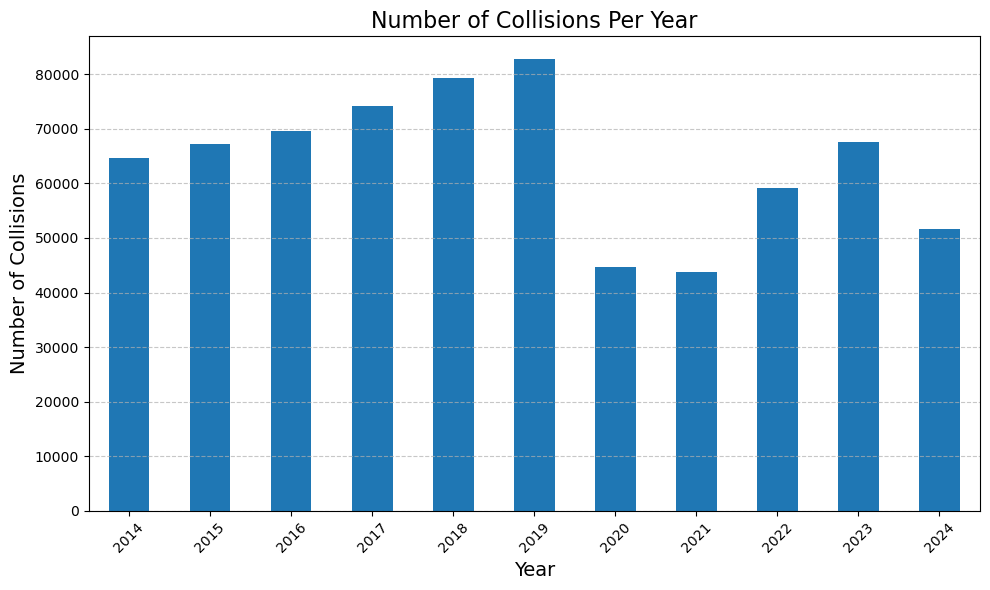

In [13]:
# plotting number of collisions per year

plt.figure(figsize=(10,6))
collisions_by_year.plot(kind="bar")


plt.title("Number of Collisions Per Year", fontsize = 16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Collisions', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()


plt.show()

#### Collisions by Month

In [15]:
# total number of collisions grouped by month
collisions_by_month = df['OCC_MONTH'].value_counts().sort_index()

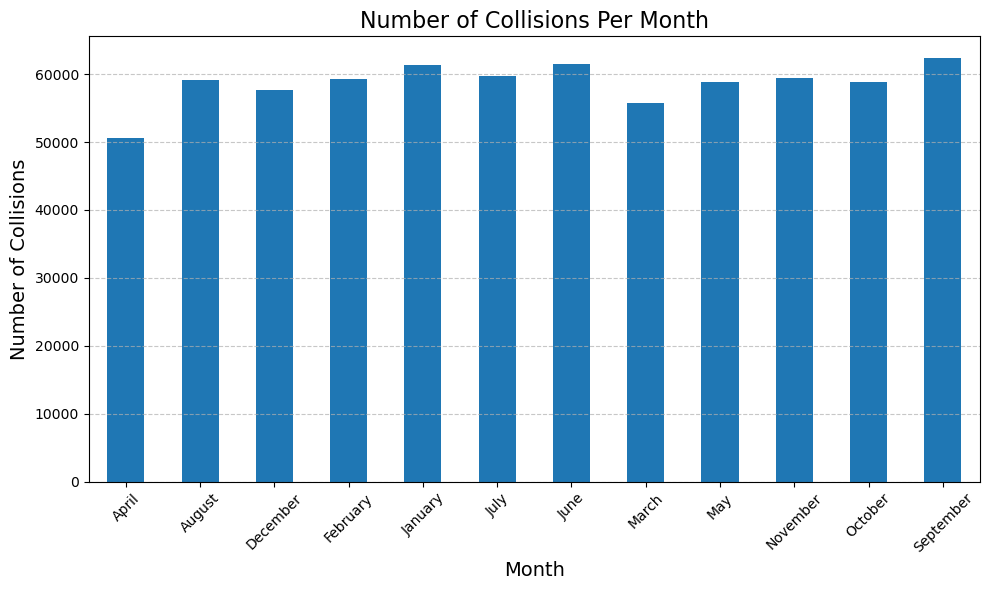

In [17]:
# plotting number of collisions per month
lt.figure(figsize=(10,6))
collisions_by_month.plot(kind="bar")


plt.title("Number of Collisions Per Month", fontsize = 16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Collisions', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()


plt.show()

#### Collisions by Hour

In [19]:
# total number of collisions grouped by hour
collisions_by_hour = df['OCC_HOUR'].value_counts().sort_index()

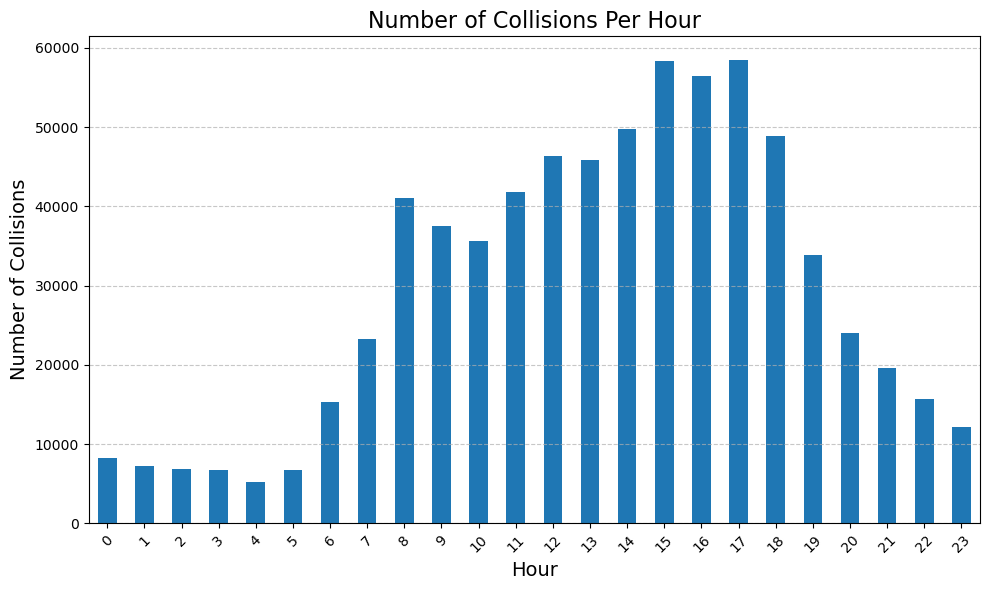

In [23]:
# plotting number of collisions per hour

plt.figure(figsize=(10,6))
collisions_by_hour.plot(kind="bar")


plt.title("Number of Collisions Per Hour", fontsize = 16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of Collisions', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()


plt.show()

#### Collisions by DOW

In [25]:
# total number of collisions grouped by DOW
collisions_by_dow = df['OCC_DOW'].value_counts().sort_index()

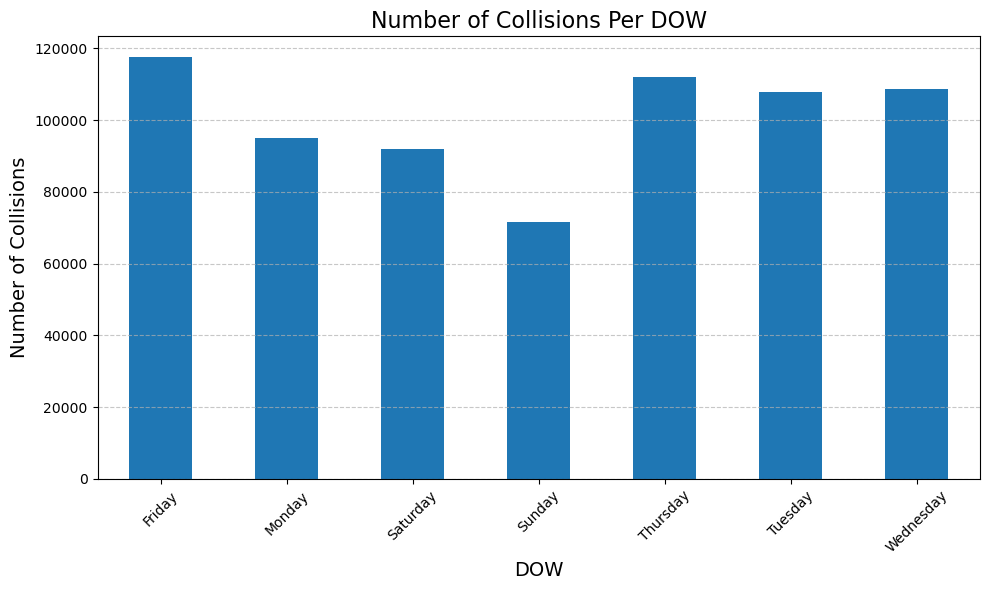

In [27]:
# plotting number of collisions by day of week

plt.figure(figsize=(10,6))
collisions_by_dow.plot(kind="bar")


plt.title("Number of Collisions Per DOW", fontsize = 16)
plt.xlabel('DOW', fontsize=14)
plt.ylabel('Number of Collisions', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()


plt.show()

In [ ]:
df['MOTORCYCLE'].value_counts()

In [ ]:
df['AUTOMOBILE'].value_counts()

In [ ]:
df['BICYCLE'].value_counts()

In [ ]:
df['PEDESTRIAN'].value_counts()

In [ ]:
df['PASSENGER'].value_counts()

In [ ]:
df['INJURY_COLLISIONS'].value_counts()

In [ ]:
df['FATALITIES'].value_counts()

In [ ]:
df['PD_COLLISIONS'].value_counts()

## Insights and Findings

## Conclusion

## Next Steps